<div align="right">Бронников Егор ПМ-1901</div>

# Построение модели линейной регрессии

Сгенерируйте 150 точек $(x,y)$ по следующему правилу: $y=10сos(1.5 sin(x))$ и добавьте к целевой переменной $y$ случайный шум из нормального распределения с отклонением $\sigma=0.5$. Разбейте выборку на обучение и контроль в соотношении 2:1.

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def true_fun(x):
    return 10 * np.cos(1.5 * np.sin(x))

n_samples = 150

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.5

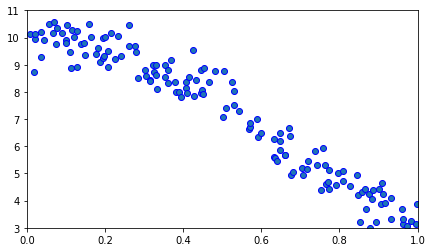

In [3]:
plt.rcParams['figure.figsize'] = (7,4)
plt.scatter(X, y, edgecolor='b', label='Samples')
plt.xlim(0, 1)
plt.ylim(3, 11)
plt.show()

## Полиномиальная регрессия

Методом наименьших квадратов по обучающей выборке постройте полиномиальную регрессию достаточно высокого порядка (например, 15-20), визуализируйте полученную модель и оцените MSE на отложенной выборке.

In [4]:
degree = 17

In [5]:
X = X.reshape(-1, 1)

In [6]:
X_test = np.linspace(0, 1, 100).reshape(-1, 1)

In [7]:
model = LinearRegression()

In [8]:
polynomial_features = PolynomialFeatures(degree=degree)
polynomial_features.fit(X)

PolynomialFeatures(degree=17)

In [9]:
X_poly = polynomial_features.transform(X)

In [10]:
model.fit(X_poly, y)

LinearRegression()

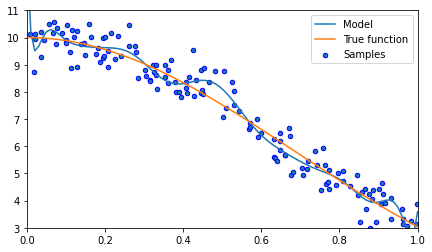

In [11]:
X_test_poly = polynomial_features.transform(X_test)
plt.plot(X_test, model.predict(X_test_poly), label='Model')
plt.plot(X_test, true_fun(X_test), label='True function')
plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
plt.xlim(0, 1)
plt.ylim(3, 11)
plt.legend()
plt.show()

**MSE**

In [12]:
mean_squared_error(true_fun(X_test), model.predict(X_test_poly))

0.16461272500428614

## Гребневая регрессия

Постройте гребневую регрессию. Методом кросс-валидации (GridSearchCV) выберите оптимальный параметр $\lambda$ (alpha в функции Ridge). Получите предсказания полученной моделью для тестовой выборки и оцените качество предсказаний.

In [13]:
alpha_list = {'alpha': [0, 0.01, 0.1, 0.5, 1]}

In [14]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [15]:
X_poly = polynomial_features.transform(X)

In [16]:
model = Ridge()

In [17]:
gs = GridSearchCV(model, alpha_list, scoring='neg_mean_squared_error', cv=kf)

In [18]:
gs.fit(X_poly, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), param_grid={'alpha': [0, 0.01, 0.1, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [19]:
gs.best_estimator_

Ridge(alpha=0)

In [20]:
gs.best_params_

{'alpha': 0}

In [21]:
gs.best_score_

-0.26005346428220383

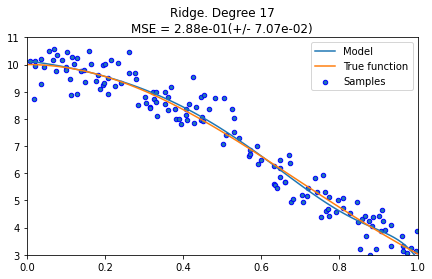

In [22]:
polynomial_features = PolynomialFeatures(degree=degree)
model = Ridge(alpha=0.01)

pipeline = Pipeline([('polynomial_features', polynomial_features),
                     ('ridge', model)])

pipeline.fit(X, y)

scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=10)

plt.plot(X_test, pipeline.predict(X_test), label='Model')
plt.plot(X_test, true_fun(X_test), label='True function')
plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
plt.xlim(0, 1)
plt.ylim(3, 11)
plt.legend(loc="best")
plt.title("Ridge. Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(17, -scores.mean(), scores.std()))
plt.show()

**MSE**

In [23]:
-scores.mean()

0.2879522736882737

## Лассо регрессия

Постройте лассо-регрессию. Методом кросс-валидации выберите оптимальный параметр $\lambda$.  Получите предсказания полученной моделью для тестовой выборки и оцените качество предсказаний.

In [24]:
alpha_list = {'alpha': [0.001, 0.01, 0.1, 0.5, 1]}

In [25]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
X_poly = polynomial_features.transform(X)

In [27]:
model = Lasso()

In [28]:
gs = GridSearchCV(model, alpha_list, scoring='neg_mean_squared_error', cv=kf)

In [29]:
gs.fit(X_poly, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [30]:
gs.best_estimator_

Lasso(alpha=0.001)

In [31]:
gs.best_params_

{'alpha': 0.001}

In [32]:
gs.best_score_

-0.2905425461145019

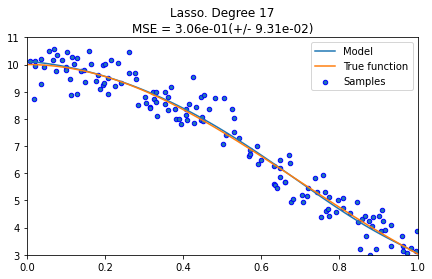

In [33]:
polynomial_features = PolynomialFeatures(degree=degree)
model = Lasso(alpha=0.001)

pipeline = Pipeline([('polynomial_features', polynomial_features),
                     ('lasso', model)])

pipeline.fit(X, y)

scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=10)

plt.plot(X_test, pipeline.predict(X_test), label='Model')
plt.plot(X_test, true_fun(X_test), label='True function')
plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
plt.xlim(0, 1)
plt.ylim(3, 11)
plt.legend(loc="best")
plt.title("Lasso. Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(17, -scores.mean(), scores.std()))
plt.show()

**MSE**

In [34]:
-scores.mean()

0.30606899225978984

## Сравнение результатов

Сравните качество результатов визуально и с помощью MSE.

In [35]:
plt.rcParams['figure.figsize'] = (20,5)

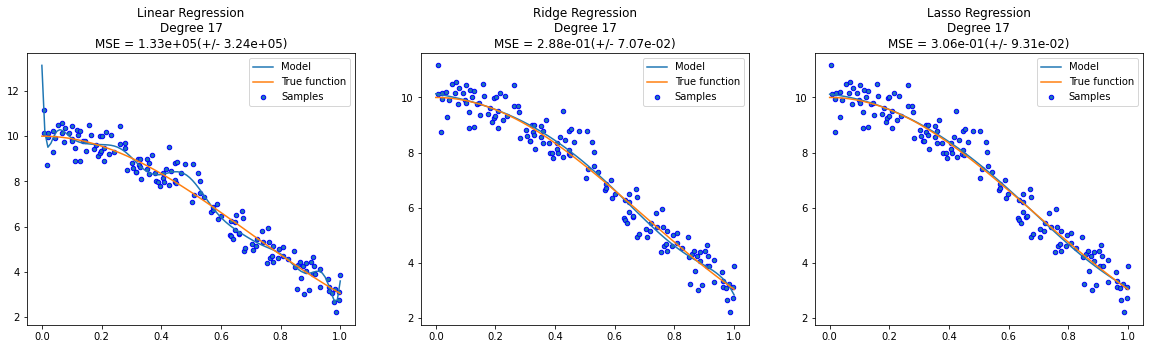

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax = [ax1, ax2, ax3]
names = ["Linear", "Ridge", "Lasso"]

for i in range(3):

    polynomial_features = PolynomialFeatures(degree=degree)
    
    if i == 0:
        model = LinearRegression()
    elif i == 1:
        model = Ridge(alpha=0.01)
    else:
        model = Lasso(alpha=0.001)
    
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', model)])
    
    pipeline.fit(X, y)

    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=10)

    ax[i].plot(X_test, pipeline.predict(X_test), label='Model')
    ax[i].plot(X_test, true_fun(X_test), label='True function')
    ax[i].scatter(X, y, edgecolor='b', s=20, label='Samples')
    ax[i].legend(loc="best")
    ax[i].title.set_text("{} Regression\nDegree {}\nMSE = {:.2e}(+/- {:.2e})".format(names[i], degree, -scores.mean(), scores.std()))